# Uso de ConTexto para procesamiento 


## 1. Instalación de Contexto
Para más información, dirigete a https://ucd-dnp.github.io/ConTexto/versiones/master/instalacion/instalacion_contexto.html


In [1]:
!sudo apt-get install -y poppler-utils # install poppler
!sudo apt install tesseract-ocr # install tesseract
!pip install contexto  # Intalación de contexto

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.12).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


## 2. Vincular Google Drive con Colab

In [115]:
from google.colab import drive
drive.mount("/content/gdrive/")
# Ruta donde se encuentran todos los recursos
work_path = "gdrive/My Drive/Taller_ConTexto/"


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [12]:
# añadiendo el diccionario del idioma español para OCR
!mv "gdrive/My Drive/Taller_ConTexto/entrada/spa.traineddata" "/usr/share/tesseract-ocr/4.00/tessdata/"

## Pipeline general de procesamiento de texto
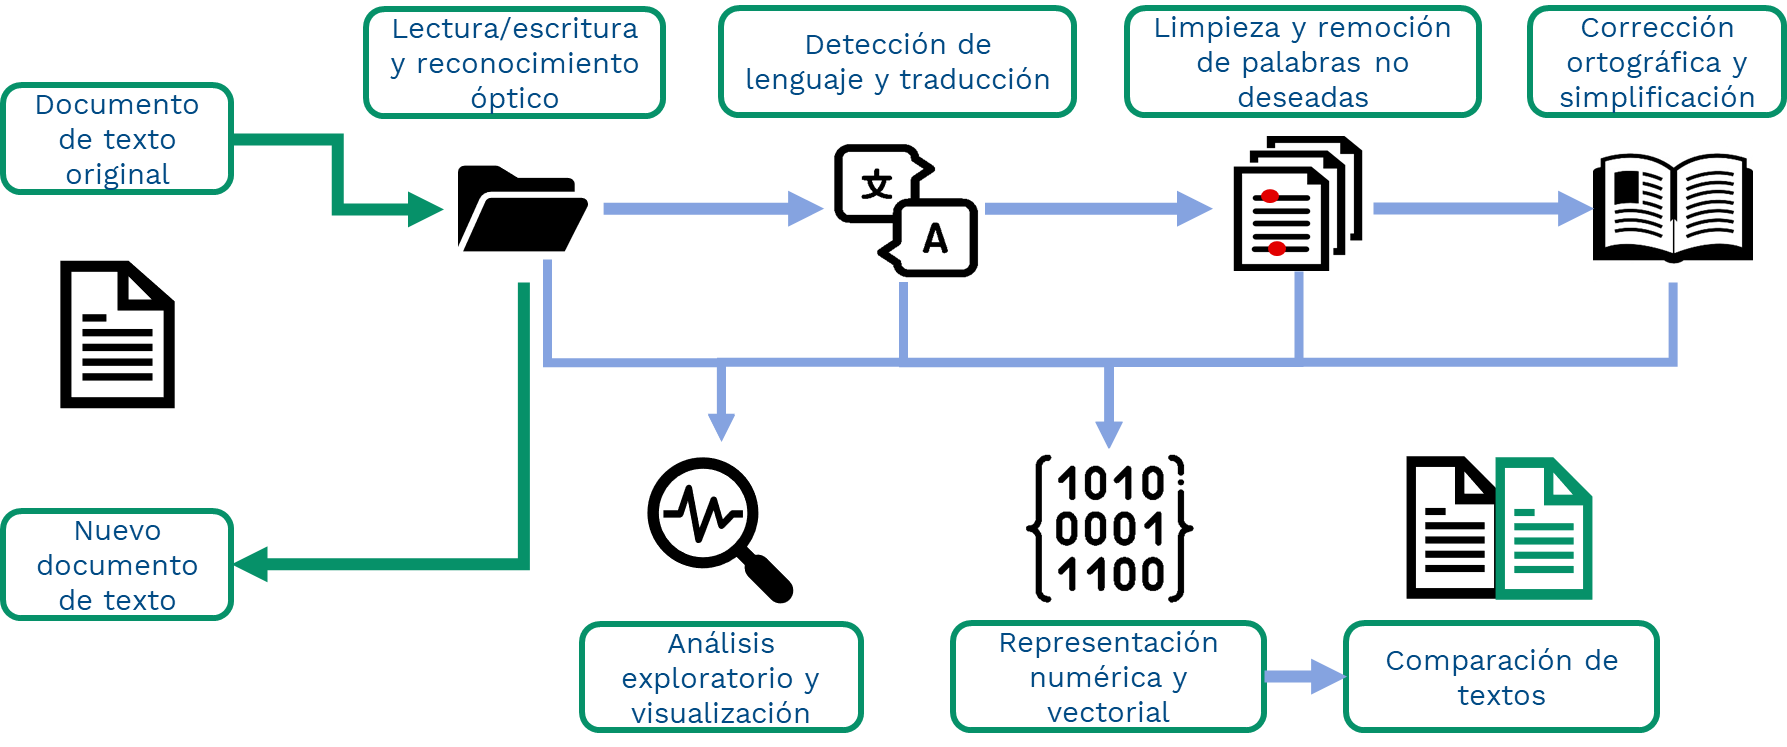

## Lectura de documentos



Para leer textos, sin importar el formato, necesitamos importar  el modulo de `lectura` de ConTexto.

In [4]:
from contexto.lectura import leer_texto

### Leer archivo txt

In [5]:
#Cargar texto de prueba en formato txt
ruta_texto01 = work_path + "/entrada/fabula_zorro_y_cuervo.txt"
texto01 = leer_texto(ruta_texto01, tipo="txt")
print(texto01)

El Zorro y El Cuervo

Cierto cuervo, de los feos el primero, robó un queso y, llevando su botín fue a saborearlo en la copa de un árbol. En estas circunstancias lo vio un zorro muy astuto, y comenzó a adularlo con la intención de arrebatárselo.
- Ciertamente, hermosa ave, no existe entre todos los pájaros quien tenga la brillantez de tus plumas, ni tu gallardía y belleza. Si tu voz tan melodiosa como deslumbrante tu plumaje, creo, y con razón, que no habrá entre las aves quien te iguale en perfección.
Envanecido el cuervo por este elogio, quiso demostrar al galante zorro la armonía de su voz. Al comenzar a graznar, dejó caer el queso de su negro pico.
El astuto zorro, que no deseaba otra cosa, cogió entre sus dientes la suculenta presa y, dejando burlado al cuervo, se puso a devorarla bajo la sombra de un árbol.

Quien a los aduladores oye
nada bueno espere de ellos.

Fin


### Leer archivo de word
La función `leer_texto` es capaz de inferir el tipo de archivo de entrada, por lo que se puede omitir el párametro de `tipo`

In [6]:
#Cargar texto de prueba en formato docx
ruta_texto02 = work_path + "/entrada/fabula_cabrito_y_lobo.docx"
texto02 = leer_texto(ruta_texto02) #sin poner extensión
print(texto02)

El cabrito y el lobo

Al salir la cabra de su establo encargó a su hijo el cuidado de la casa, advirtiéndole el peligro de los animales que rondaban por los alrededores con intención de entrar a los establos y devorar los ganados.
No tardó mucho en llegar el enemigo: ¡Un lobo horrible, amiguitos míos, un lobo!, que imitando la voz de cabra llamó cortésmente a la puerta para entrar.
Al mirar el cabrito por una rendija vio al feroz carnicero y, sin intimidarse le dirigió el siguiente discurso:
- Bien sé que eres nuestro mayor adversario y que, imitando la voz de mi madre, pretendes entrar para devorarme. Puedes marcharte, odiado animal, que no seré yo quien te abra la puerta.

 

Sigue el consejo de tus padres
y vivirás feliz toda la vida.

Fin


### Leer pdf sin OCR


In [7]:
ruta_texto03 = work_path + "/entrada/fabula_cabra_y_asno.pdf"
texto03 = leer_texto(ruta_texto03) #sin poner extensión
print(texto03)

La cabra y el asno 

Un campesino alimentaba al mismo tiempo a una 

cabra y a un asno. La cabra, envidiosa porque su 

compañero estaba mejor atendido, le dio el siguiente 

consejo: 

- La noria y la carga hacen de tu vida un tormento 

interminable; simula una enfermedad y déjate caer en 

un 

foso, 

pues 

así 

te 

dejarán 

reposar. 

El asno, poniendo en práctica el consejo, se dejó caer y 

se hirió todo el cuerpo. El amo llamó entonces a un 

veterinario y le pidió un remedio que salvase el jumento. 

El curandero, después de examinar al enfermo, dispuso 

que se le diera de comer un pulmón de cabra para 

devolverle 

las 

fuerzas. 

Y sin titubear, el labriego sacrificó de inmediato a la 

envidiosa cabra para curar a su asno. 

No hagas a otros lo que no 

quieres que hagan contigo. 

Fin 

 



### Leer pdf con OCR
Cuando el PDF es un escaner o una foto de un documento, es necesario aplicar OCR

In [13]:
ruta_texto04 = work_path + "/entrada/escaneado_1.pdf"
texto04 = leer_texto(ruta_texto04, extraer_medios= False, ocr=True, preprocesamiento=3)
print(texto04)

"B'"© L'€º2¿ HOJA Nº.

RESOLUCION Nº. 04006F 19
m

Pºr la cual se establecen lºs requisitºs para
evaluar y emitir el cºnceptº de evaluación
agrºnómica de genat1pos de papa para cºmercializar
en el territºriº colomb1ano.

EL GERENTE GEVERAL DEL INSTI TUTO COLOMBIANO AGROPECUARIO, ICA

en usº de sus facultades legales y en especial
de las que le ”cºnfieren lºs Decretºs 2141 de 1992,
2645 de 1993 y 1840 de 1994, y

CONSIDERANDO :

Que de cºnfºrmidad cºn el Decretº 1840 del 3 de agºstº de 1994
cºrrespºnde al Institutº Cºlºmbianº Agrºpecuariº, ICA, la función
de reglamentar, supervisar y cºntrºlar la prºducción,
multiplicación, cºmercialización, impºrtación y expºrtación de las
semillas para siembra y el material genéticº animal utilizadº en la
prºducción agrºpecuaria naciºnal.

Que pºr Resºlución 1880 de 1992 del — Institutº — Cºlºmbianº
Agrºpecuariº, ICA, se establecierºn las pautas generales para la
ºbtención del cºnceptº de evaluación agrºnómica de las semillas
para siembra en el país.


## Análisis exploratorio y visualización de texto
Antes de realizar análisis exploratorios sobre el texto y generar visualizaciones, se recomienda hacer una limpieza de texto, con el objetivo de eliminar palabras que no aporten información.

### Limpieza de texto
Para todos los procesos de limpieza de texto, se debe importar el módulo de `limpieza` de contexto 

In [14]:
from contexto.limpieza import limpieza_texto
from contexto.limpieza import lista_stopwords, lista_nombres

In [15]:
texto_prueba = "Esto es un texto. \nVamos  a probar    ConTexto desde Barranquilla! \nHoy 28 de abril"
print(texto_prueba)

Esto es un texto. 
Vamos  a probar    ConTexto desde Barranquilla! 
Hoy 28 de abril


In [16]:
texto_limpio = limpieza_texto(texto_prueba)
print(texto_limpio)

esto es un texto vamos a probar contexto desde barranquilla hoy de abril


In [17]:
#cargar stopwords
sw= lista_stopwords()
print(sw[:10])

['a', 'ademas', 'además', 'ahi', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Caso de uso: El quijote
Vamos a realizar análisis exploratorio y visualizaciones sobre el quijote.

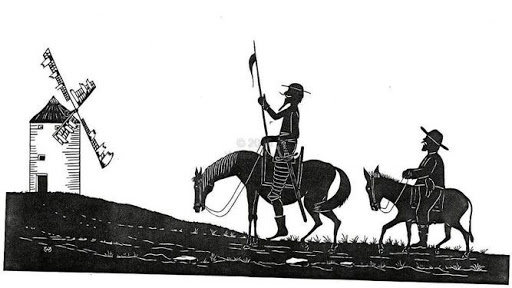

In [18]:
quijote = leer_texto(work_path + "/entrada/cervantes_don_quijote.txt")
sw = lista_stopwords()
quijote = limpieza_texto(quijote,lista_palabras=sw)
print(quijote)

the project gutenberg ebook of don quijote by miguel cervantes saavedra this ebook is for the use of anyone anywhere at cost and with almost restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg net title don quijote author miguel cervantes saavedra posting date april ebook release date december language spanish start of this project gutenberg ebook don quijote produced by an anonymous project gutenberg volunteer text file corrections and new html file by joaquin cuenca abela ingenioso hidalgo don quijote mancha tasa juan gallo andrada escribano cámara rey señor residen consejo certifico doy fe visto señores dél libro intitulado ingenioso hidalgo mancha compuesto miguel cervantes saavedra tasaron cada pliego dicho libro tres maravedís medio ochenta tres pliegos dicho precio monta dicho libro docientos noventa maravedís medio vender papel dieron licencia precio pueda vender m

**Crear nubes de palabras del texto**

In [19]:
from contexto.exploracion import nube_palabras

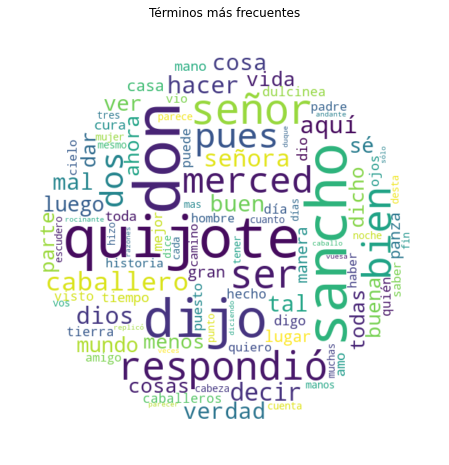

In [39]:
## Graficar y guardar nubes de palabras y bigramas
# El parámetro "dim_figura" permite definir el tamaño de la gráfica
nube_palabras(quijote, n_grama=1, dim_figura=(8,8))

**Crear barcharts de texto**

In [41]:
from contexto.exploracion import grafica_barchart_frecuencias

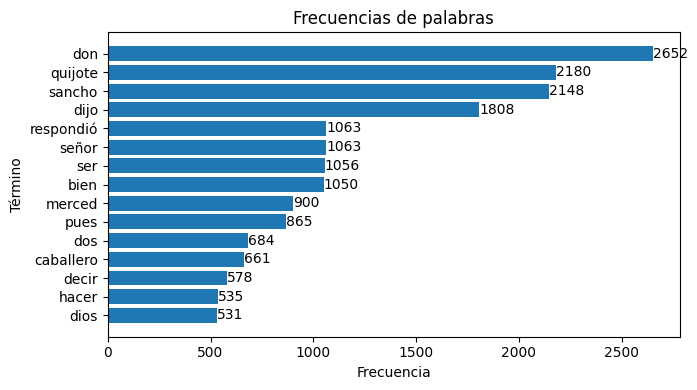

In [89]:
# Gráficas de barras con las frecuencias
grafica_barchart_frecuencias(quijote, ubicacion_archivo='', n_grama=1,n_terminos=15,
                             titulo='Frecuencias de palabras', dim_figura=(7,4))

**Grafico de redes o coocurrencia**

In [47]:
from contexto.exploracion import matriz_coocurrencias, graficar_coocurrencias

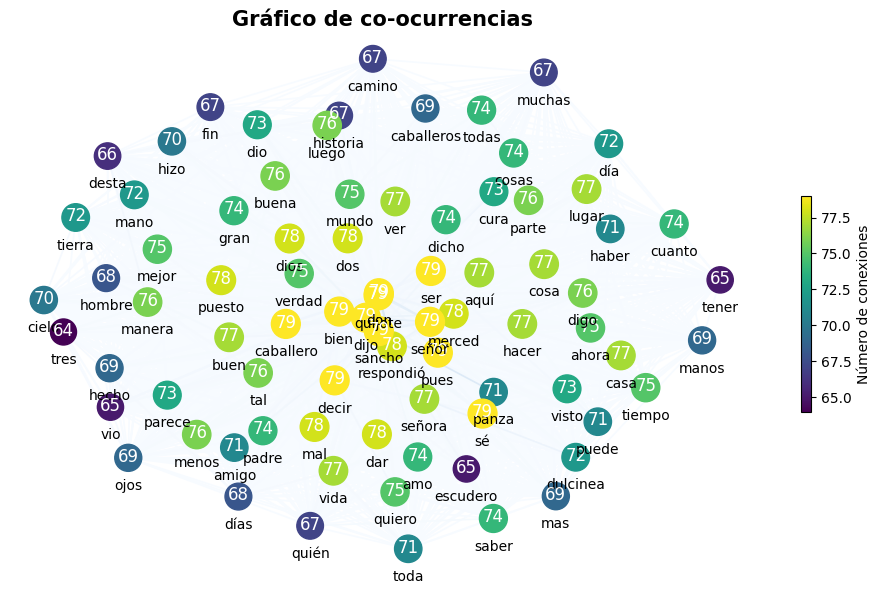

<AxesSubplot:title={'center':'Gráfico de co-ocurrencias'}>

In [114]:
# Solo se cuenta la coocurrencia si las palabras están a 5 o menos palabras entre sí
mat_ven = matriz_coocurrencias(quijote, max_num=80, modo='ventana', ventana=3)

## Graficar co-ocurrencias de palabras en el texto
graficar_coocurrencias(mat_ven, dim_figura=(12,7), seed = 10, escala = 400,
                      offset_y =0.13, vmin= 10, vmax = 75,  node_cmap = "viridis")

**Gráfico de dispersión**

In [87]:
from contexto.exploracion import graficar_dispersion
from contexto.exploracion import obtener_ngramas

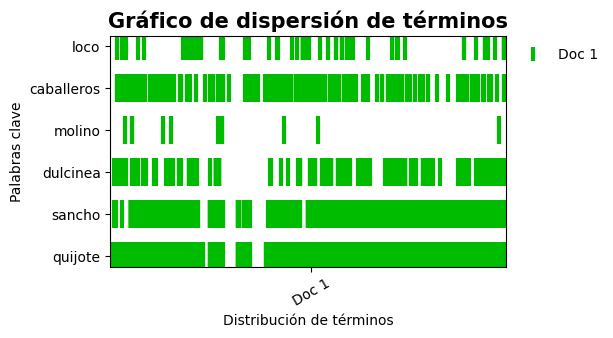

In [86]:
# Se definen las palabras de interés
mis_palabras = ['quijote', 'sancho', 'dulcinea', 'molino', "caballeros", "loco"]

# Gráfico de dispersión
graficar_dispersion(quijote, mis_palabras, dim_figura=(6,3))

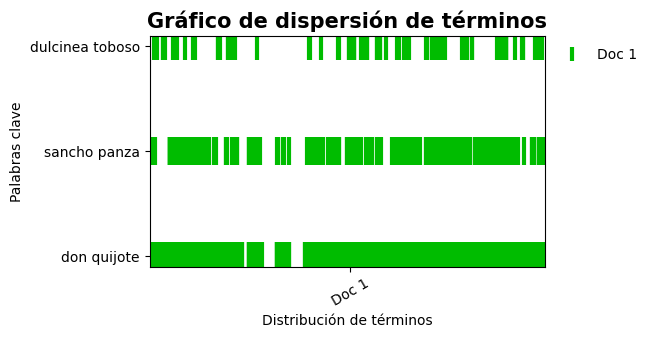

In [91]:
quijote_bi = obtener_ngramas(quijote, 2)
mis_palabras = ["don quijote", "sancho panza", "dulcinea toboso"]
graficar_dispersion([quijote_bi], mis_palabras, dim_figura=(6,3))

### Comparación de documentos


**Comparación por gráfico de dispersión**

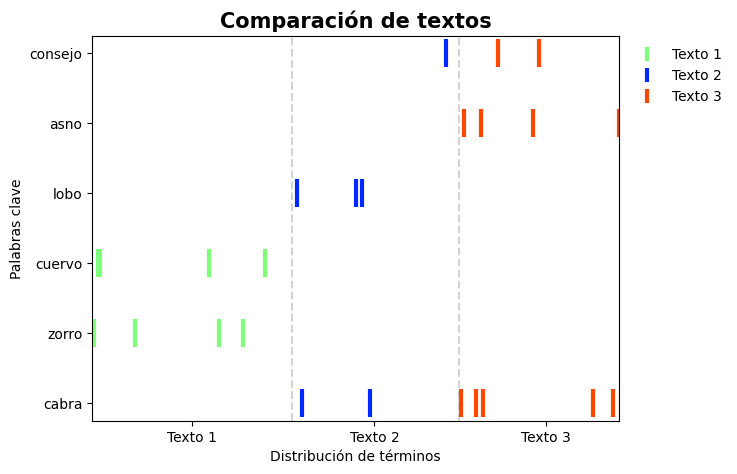

In [99]:
documentos = [texto01, texto02, texto03]
palabras = ["cabra", "zorro", "cuervo", "lobo", "asno", "consejo"]
graficar_dispersion(documentos, palabras, titulo = 'Comparación de textos', rotacion = 0,
                    etiquetas = ['Texto 1', 'Texto 2', 'Texto 3'],
                    mapa_color='jet', auto_etiquetas = True, leyenda = True, dim_figura=(8,5))

**Comparación con gráficos de redes**

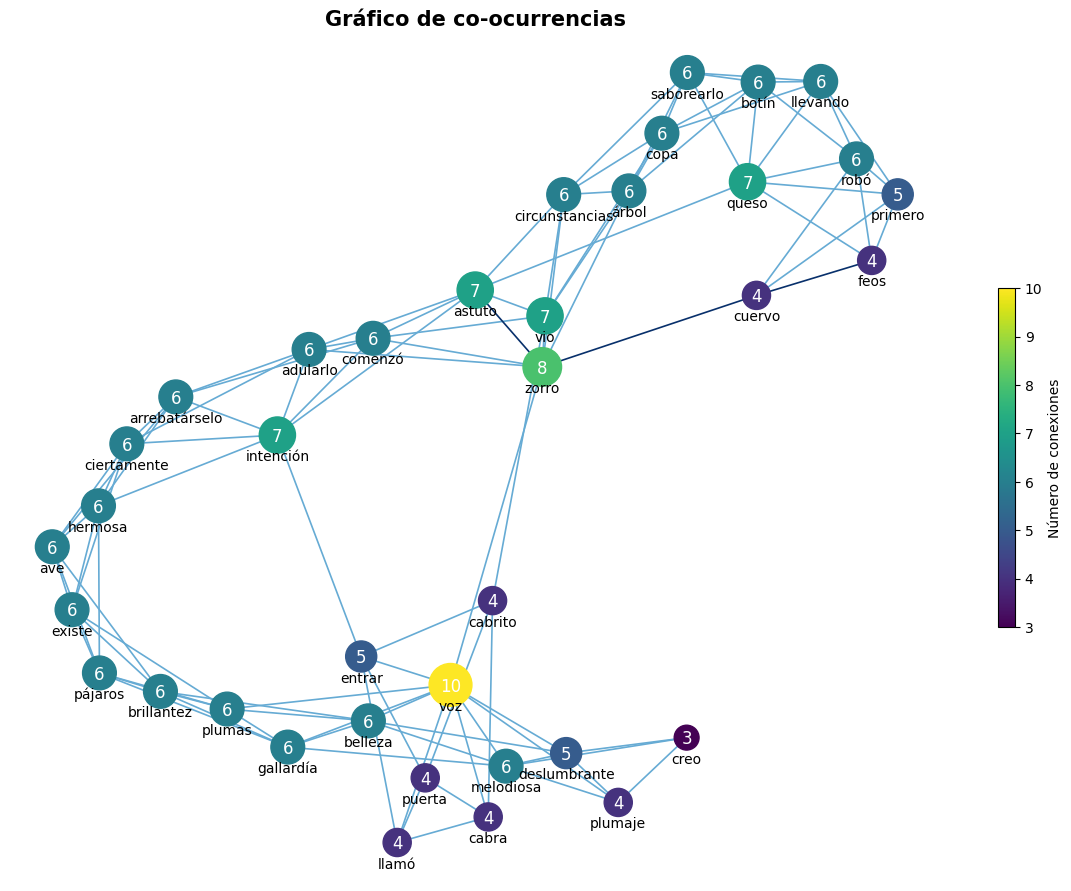

<AxesSubplot:title={'center':'Gráfico de co-ocurrencias'}>

In [104]:
documentos = [texto01, texto02, texto03]
# limpieza básica de texto para  quitar puntuaciones
documentos = [limpieza_texto(t, lista_palabras=sw) for t in documentos]

mat_doc = matriz_coocurrencias(documentos, max_num=50,modo="ventana", ventana=3)

graficar_coocurrencias(mat_doc, n_nodos = 0.75, vmin= 50, escala = 900,dim_figura=(15,11),
                       node_cmap = "viridis", offset_y = 0.06, seed = 1)

## Vectorización de texto

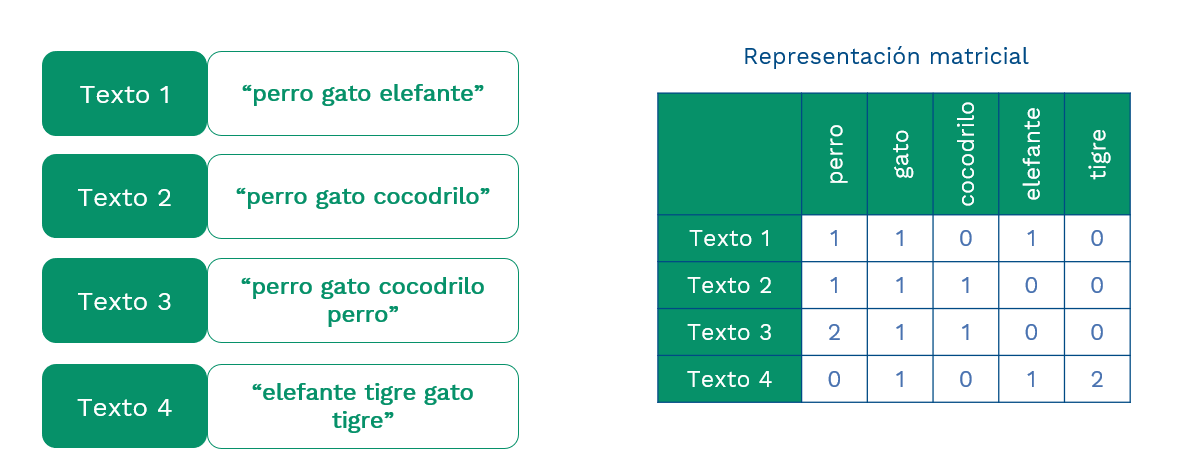

Todas las funcionalidades necesarias para la vectorización de texto se encuentran dentro del módulo de `vectorizción de ConTexto`.

In [117]:
from contexto.vectorizacion import *
import pandas as pd

In [118]:
texto1 = "perro gato elefante"
texto2 = "perro gato cocodrilo"
texto3 = "perro gato cocodrilo perro"
texto4 = "elefante tigre gato tigre"
textos = [texto1, texto2, texto3, texto4]

### 1. Bag Of Words (BOW)

In [130]:
# Preparamos el vectorizador de Bag of Words
v_bow = VectorizadorFrecuencias(tipo="bow", rango_ngramas=(1,1))
v_bow.ajustar(textos)
textos_vectorizados = v_bow.vectorizar(textos)
#obtener la matriz de datos vectorizada
vocabulario = v_bow.vocabulario()
vocabulario

,posición,palabra
0,0,cocodrilo
1,1,elefante
2,2,gato
3,3,perro
4,4,tigre


In [131]:
print(pd.DataFrame(textos_vectorizados, columns=list(vocabulario["palabra"])))

   cocodrilo  elefante  gato  perro  tigre
0          0         1     1      1      0
1          1         0     1      1      0
2          1         0     1      2      0
3          0         1     1      0      2


### 2. Term Frequency Inverse Document Frequency TF-IDF

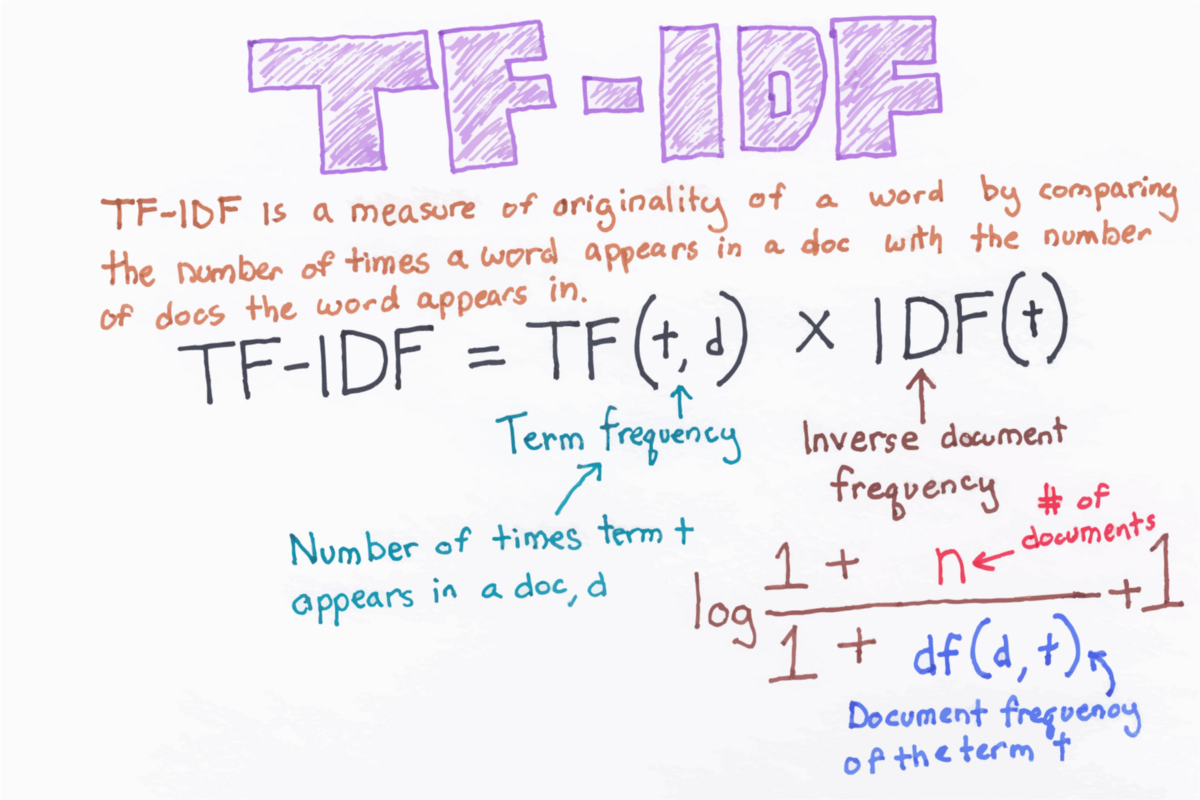

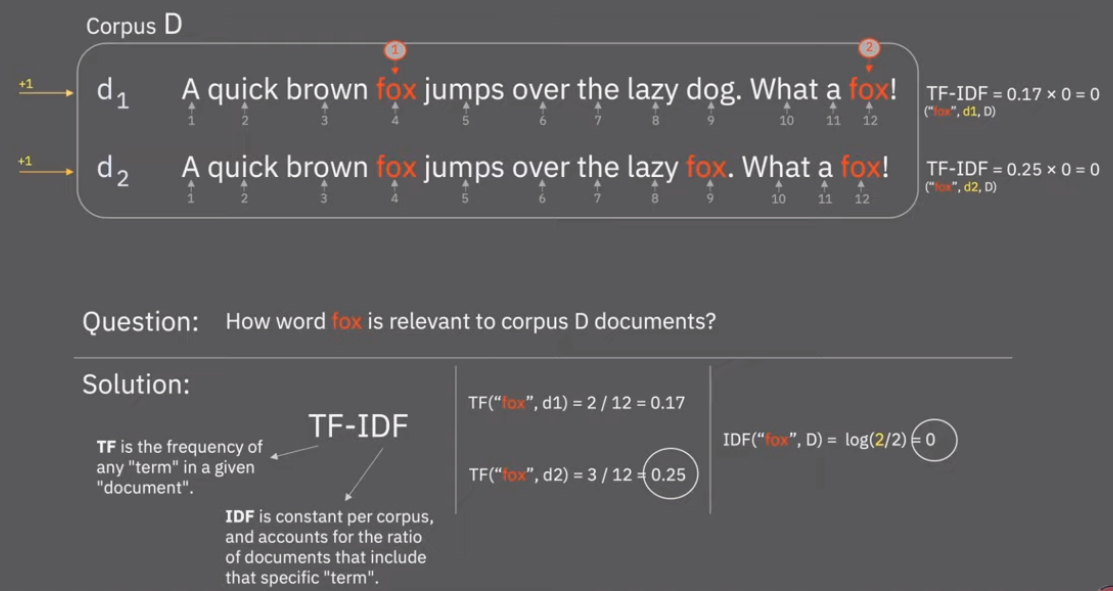

In [132]:
v_tfidf = VectorizadorFrecuencias(tipo="tfidf", rango_ngramas=(1,1))
v_tfidf.ajustar(textos)
textos_vectorizados = v_tfidf.vectorizar(textos)
#obtener la matriz de datos vectorizada
vocabulario = v_tfidf.vocabulario()
vocabulario

,posición,palabra
0,0,cocodrilo
1,1,elefante
2,2,gato
3,3,perro
4,4,tigre


In [133]:
print(pd.DataFrame(textos_vectorizados, columns=list(vocabulario["palabra"])))

   cocodrilo  elefante      gato    perro    tigre
0   0.000000  0.691131  0.457453  0.55953  0.00000
1   0.691131  0.000000  0.457453  0.55953  0.00000
2   0.496303  0.000000  0.328498  0.80360  0.00000
3   0.000000  0.356389  0.235891  0.00000  0.90407


### 3. Word2Vec


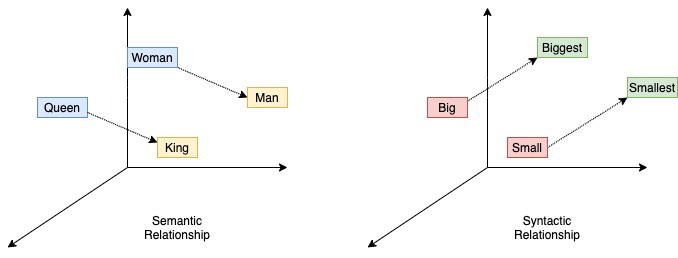

In [136]:
## Inicializar el vectorizador
v_word2vec = VectorizadorWord2Vec(lenguaje="es")
## NO ES NECESARIO AJUSTAR!! 
## Vectorizar textos utilizando el vectorizador
textos_vectorizados = v_word2vec.vectorizar(textos)
print("Dimensiones del vector:", textos_vectorizados.shape)
print("Primeros 10 elementos del vector:\n", textos_vectorizados[0,:10])


Dimensiones del vector: (4, 300)
Primeros 10 elementos del vector:
 [ 0.40945336  0.79772663 -2.3466332   1.7237      1.17167    -0.87951326
 -2.2687333   0.8401833   1.9570667   2.8956668 ]


In [138]:
df_palabras = v_word2vec.vectores_palabras(textos[0], tipo='dataframe')
df_palabras

,palabra,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_291,x_292,x_293,x_294,x_295,x_296,x_297,x_298,x_299,x_300
0,perro,1.44630,1.97000,-2.1727,1.5553,0.62831,-1.73170,-2.6759,2.35430,1.5936,...,1.63060,-0.83896,-0.24469,1.13320,0.58863,-4.7285,-0.9958,-3.77550,-1.08910,1.25660
1,gato,-0.36330,-0.48841,-2.7278,2.3517,1.64590,-0.14743,-3.0710,0.43446,2.3760,...,0.66003,0.26409,-0.70738,-0.75407,-1.23700,-3.6562,-2.3117,-2.47540,-1.36200,0.68819
2,elefante,0.14536,0.91159,-2.1394,1.2641,1.24080,-0.75941,-1.0593,-0.26821,1.9016,...,1.05480,-0.60360,-0.15089,0.96275,-0.49921,-2.3030,-1.2720,-0.91684,-0.59908,-0.53012


## Comparación entre textos

Este ejemplo muestra las principales funcionalidades del módulo `comparacion` de la librería. Este módulo permite calcular distintas métricas de distancia y similitud entre dos o más textos. La capacidad para cuantificar qué tan similares o diferentes son un grupo de textos o cadenas de caracteres entre sí puede ser muy útil para ciertos procesos como detección de textos atípicos, identificación de afinidad entre documentos y estandarización de valores string, entre otros.

In [139]:
from contexto.comparacion import Similitud

Volvemos a utilizar los textos de las fábulas de secciones anteriores

In [141]:
print('----- Primeros 30 caracteres de cada texto:')
print(f'* Fábula 1: {texto01[:20]}')
print(f'* Fábula 2: {texto02[:20]}')
print(f'* Fábula 3: {texto03[:20]}')

----- Primeros 30 caracteres de cada texto:
* Fábula 1: El Zorro y El Cuervo
* Fábula 2: El cabrito y el lobo
* Fábula 3: La cabra y el asno 



In [145]:
corpus = [texto01, texto02, texto03]
#Limpieza de texto
corpus_limpio = [limpieza_texto(d,lista_palabras=sw,quitar_acentos=True) for d in corpus]
# Mostrar primera fábula despues de la limpieza
print(corpus_limpio[0])

zorro cuervo cierto cuervo feos primero robo queso llevando botin saborearlo copa arbol circunstancias vio zorro astuto comenzo adularlo intencion arrebatarselo ciertamente hermosa ave existe pajaros brillantez plumas gallardia belleza voz melodiosa deslumbrante plumaje creo razon aves iguale perfeccion envanecido cuervo elogio quiso demostrar galante zorro armonia voz comenzar graznar dejo caer queso negro pico astuto zorro deseaba cosa cogio dientes suculenta presa dejando burlado cuervo puso devorarla bajo sombra arbol aduladores oye bueno espere fin


In [148]:
#Vectorizar con BOW
v_bow = VectorizadorFrecuencias(tipo="bow")
v_bow.ajustar(corpus_limpio)
textos_vectorizados = v_bow.vectorizar(corpus_limpio)


In [149]:
vocab = v_bow.vocabulario()
print(pd.DataFrame(textos_vectorizados, columns=list(vocab["palabra"])))

   abra  aduladores  adularlo  adversario  advirtiendole  alimentaba  \
0     0           1         1           0              0           0   
1     1           0         0           1              1           0   
2     0           0         0           0              0           1   

   alrededores  amiguitos  amo  animal  ...  tiempo  titubear  toda  tormento  \
0            0          0    0       0  ...       0         0     0         0   
1            1          1    0       1  ...       0         0     1         0   
2            0          0    1       0  ...       1         1     0         1   

   veterinario  vida  vio  viviras  voz  zorro  
0            0     0    1        0    2      4  
1            0     1    1        1    2      0  
2            1     1    0        0    0      0  

[3 rows x 171 columns]


**Similitud**

In [152]:
similarity_obj = Similitud(v_bow)
mat_sim = similarity_obj.coseno(textos_vectorizados)
mat_sim

array([[1.        , 0.07180337, 0.03703704],
       [0.07180337, 1.        , 0.16412199],
       [0.03703704, 0.16412199, 1.        ]])

In [153]:
fabulas = ["el cabrito y el lobo", "la cabra y el asno", "el zorro y el cuervo"]
pd.DataFrame(mat_sim, index=fabulas, columns=fabulas)

,el cabrito y el lobo,la cabra y el asno,el zorro y el cuervo
el cabrito y el lobo,1.000000,0.071803,0.037037
la cabra y el asno,0.071803,1.000000,0.164122
el zorro y el cuervo,0.037037,0.164122,1.000000


**Similitud utilizando Word2Vec**

In [154]:
t1 = 'los perros y los gatos suelen pelear mucho.'
t2 = 'caninos y felinos entran en disputas con frecuencia.'
t3 = 'este tercer texto habla sobre un tema distinto a los otros dos'

for k1, i in zip(["t1","t2"],[t1, t2]):
    for k2, j in zip(["t2","t3"],[t2, t3]):
        if i != j:
            similitud = v_word2vec.similitud_textos(i, j)
            print('-----------------------')
            print(f'Texto {k1}: {i}')
            print(f'Texto {k2}: {j}')
            print(f'Similitud entre textos: {similitud}')


-----------------------
Texto t1: los perros y los gatos suelen pelear mucho.
Texto t2: caninos y felinos entran en disputas con frecuencia.
Similitud entre textos: 0.6875509408308378
-----------------------
Texto t1: los perros y los gatos suelen pelear mucho.
Texto t3: este tercer texto habla sobre un tema distinto a los otros dos
Similitud entre textos: 0.5168476867313971
-----------------------
Texto t2: caninos y felinos entran en disputas con frecuencia.
Texto t3: este tercer texto habla sobre un tema distinto a los otros dos
Similitud entre textos: 0.4299091504956323
